# Download US patent data


### WRDS

Downloaded from
https://wrds-www.wharton.upenn.edu/login/?next=/pages/get-data/wrds-us-patents/compustat-link/



US Patent Public Search tool:

https://ppubs.uspto.gov/pubwebapp/


| Type | Query |
|---|---|
| Search for keywords<br>in all document | (Cryptocurrency OR bitcoin OR ethereum OR "distributed ledge" OR "consensus mechanism"<br>OR "smart contract" OR "digital asset" OR "non-fungible token" OR <br>"decentralized finance" OR "initial coin offering" OR "decentralized autonomous organization"<br>OR "decentralized application") AND @pd>="2010"<2011 |
| Search in the abstract<br>and brief summary | ((blockchain.ab. OR blockchain.bsum.) OR (Cryptocurrency.ab. OR Cryptocurrency.bsum.) <br>OR (bitcoin.ab. OR bitcoin.bsum.) OR (ethereum.ab. OR ethereum.bsum.) OR <br>("distributed ledge".ab. OR "distributed ledge".bsum.) OR ("consensus mechanism".ab. <br>OR "consensus mechanism".bsum.) OR ("smart contract".ab. OR "smart contract".bsum.) <br>OR ("digital asset".ab. OR "digital asset".bsum.) OR ("non-fungible token".ab. OR <br>"non-fungible token".bsum.) OR ("decentralized finance".ab. OR "decentralized finance".bsum.)<br>OR ("initial coin offering".ab. OR "initial coin offering".bsum.) OR<br>("decentralized autonomous organization".ab. OR "decentralized autonomous organization".bsum.) <br>OR ("decentralized application".ab. OR "decentralized application".bsum.)) |

These are the two ways that the patent database could be queried but fo the purpose of this research, we will first extract the keywords from the patent's ABSTARCT and BRIEF SUMMARY

Save the results "filingDate" and "patentNumber" into a csv file: "query_absBsm_USPT.csv"

# For Great Britain

https://worldwide.espacenet.com/patent/search?f=cc%3Ain%3Dgb&q=%28ab%20%3D%20%22Blockchain%22%20OR%20desc%20%3D%20%22Blockchain%22%29%20OR%20%28ab%20%3D%20%22Cryptocurrency%22%20OR%20desc%20%3D%20%22Cryptocurrency%22%29%20OR%20%28ab%20%3D%20%22bitcoin%22%20OR%20desc%20%3D%20%22bitcoin%22%29%20OR%20%28ab%20%3D%20%22consensus%20mechanism%22%20OR%20desc%20%3D%20%22consensus%20mechanism%22%29%20OR%20%28ab%20%3D%20%22smart%20contract%22%20OR%20desc%20%3D%20%22smart%20contract%22%29%20OR%20%28ab%20%3D%20%22digital%20asset%22%20OR%20desc%20%3D%20%22digital%20asset%22%29%20OR%20%28ab%20%3D%20%22non-fungible%20token%22%20OR%20desc%20%3D%20%22non-fungible%20token%22%29%20OR%20%28ab%20%3D%20%22decentralized%20finance%22%20OR%20desc%20%3D%20%22decentralized%20finance%22%29%20OR%20%28ab%20%3D%20%22initial%20coin%20offering%22%20OR%20desc%20%3D%20%22initial%20coin%20offering%22%29%20OR%20%28ab%20%3D%20%22decentralized%20autonomous%20organization%22%20OR%20desc%20%3D%20%22decentralized%20autonomous%20organization%22%29%20OR%20%28ab%20%3D%20%22decentralized%20application%22%20OR%20desc%20%3D%20%22decentralized%20application%22%29&queryLang=en%3Ade%3Afr

| Type | Query |
|---|---|
| Search in the abstract<br>and description | (ab = "Blockchain" OR desc = "Blockchain") OR (ab = "Cryptocurrency" OR desc = "Cryptocurrency") OR (ab = "bitcoin" OR desc = "bitcoin") OR (ab = "consensus mechanism" OR desc = "consensus mechanism") OR (ab = "smart contract" OR desc = "smart contract") OR (ab = "digital asset" OR desc = "digital asset") OR (ab = "non-fungible token" OR desc = "non-fungible token") OR (ab = "decentralized finance" OR desc = "decentralized finance") OR (ab = "initial coin offering" OR desc = "initial coin offering") OR (ab = "decentralized autonomous organization" OR desc = "decentralized autonomous organization") OR (ab = "decentralized application" OR desc = "decentralized application") |

These are the two ways that the patent database could be queried but fo the purpose of this research, we will first extract the keywords from the patent's ABSTARCT and DESCRIPTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from time import time

In [2]:
df_meta = pd.read_csv("uspatents_meta.csv", low_memory=False)
df_meta.patnum = pd.to_numeric(df_meta.patnum, errors='coerce', downcast='integer')
print(df_meta[["patnum", "grantdate", "appldate"]].head(5))

df_link = pd.read_csv("uspatents_gvkey_linking.csv", low_memory=False)
df_link.patnum = pd.to_numeric(df_link.patnum, errors='coerce', downcast='integer')
print(df_link[["patnum", "gvkey_numeric"]].head(5))

df_list = pd.read_csv("query_absBsm_USPT.csv", low_memory=False)
df_list.patentNumber = pd.to_numeric(df_list.patentNumber, errors='coerce', downcast='integer')
print(df_list.head(10))

df_UKlist = pd.read_csv("query_absDesc_Espace.csv", low_memory=False)
df_UKlist.familyNumber = pd.to_numeric(df_UKlist.familyNumber, errors='coerce', downcast='integer')
print(df_UKlist.head(5))


      patnum   grantdate    appldate
0  7865968.0  2011-01-11  2006-04-18
1  7865969.0  2011-01-11  2005-02-03
2  7865976.0  2011-01-11  2006-10-04
3  7865977.0  2011-01-11  2007-01-19
4  7865978.0  2011-01-11  2008-08-26
      patnum  gvkey_numeric
0  7865968.0           7435
1  7865982.0           5639
2  7865983.0           5639
3  7865988.0         116504
4  7865990.0         251303
   filingDate  patentNumber
0  25/06/2009  2.010033e+10
1  25/04/2005  7.860830e+06
2  09/03/2005  7.860013e+06
3  22/06/2009  2.010032e+10
4  05/03/2008  7.856604e+06
5  11/06/2009  2.010032e+10
6  21/07/2010  2.010031e+10
7  03/06/2009  2.010031e+10
8  31/10/2006  7.849328e+06
9  30/07/2010  2.010031e+10
   filingDate  familyNumber                                            company
0  10/04/2019      72749305  AKIVA CAPITAL HOLDINGS LLC [US] \nAKIVA CAPITA...
1  23/02/2016      58191502                           NCHAIN HOLDINGS LTD [AG]
2  29/04/2016      56234104                           NCHAIN HOLD

In [3]:
# Assuming 'filingDate' column contains dates in 'dd/mm/yyyy' format
df_list['filingDate'] = pd.to_datetime(df_list['filingDate'], format="%d/%m/%Y")

# Filter rows with 'filingDate' from 2010 to 2022
df_list = df_list[(df_list['filingDate'].dt.year > 2009) & (df_list['filingDate'].dt.year <= 2022)]
print(len(df_list))
print(len(df_list.drop_duplicates(subset=["patentNumber"])))

16194
16194


In [4]:
# Assuming 'filingDate' column contains dates in 'dd/mm/yyyy' format
df_UKlist['filingDate'] = pd.to_datetime(df_UKlist['filingDate'], format="%d/%m/%Y")

# Filter rows with 'filingDate' from 2010 to 2022
df_UKlist = df_UKlist[(df_UKlist['filingDate'].dt.year > 2009) & (df_UKlist['filingDate'].dt.year <= 2022)]
print(len(df_UKlist))
print(len(df_UKlist.drop_duplicates(subset=["familyNumber"])))

753
753


In [5]:

# Extract month and year in the desired format
df_list['filingMonthYear'] = df_list['filingDate'].dt.strftime('%m/%Y')

# Group by month and year and count the number of patents
patents_per_month = df_list.groupby('filingMonthYear').size().reset_index(name='number_of_patents')

# Calculate percentage increase in patents for each month
patents_per_month['percentage_increase'] = patents_per_month['number_of_patents'].pct_change() * 100

# Sort by year and month
patents_per_month['filingYear'] = pd.to_datetime(patents_per_month['filingMonthYear']).dt.year
patents_per_month['filingMonth'] = pd.to_datetime(patents_per_month['filingMonthYear']).dt.month
patents_per_month = patents_per_month.sort_values(by=['filingYear', 'filingMonth'])

# Create the final DataFrame
patents_data = {
    'filingMonthYear': patents_per_month['filingMonthYear'],
    'number_of_patents': patents_per_month['number_of_patents'],
    'percentage_increase': patents_per_month['percentage_increase']
}
patents_per_month_df = pd.DataFrame(patents_data)

print(patents_per_month_df)


# # Assuming df_list contains your DataFrame with patent data

# # Extract year and quarter from filingDate column
# df_list['filingYear'] = df_list['filingDate'].dt.year
# df_list['quarter'] = df_list['filingDate'].dt.quarter

# # Group by year and quarter and count the number of patents
# patents_per_quarter = df_list.groupby(['filingYear', 'quarter']).size().reset_index(name='number_of_patents')

# # Calculate percentage increase in patents for each quarter
# patents_per_quarter['percentage_increase'] = patents_per_quarter.groupby('filingYear')['number_of_patents'].pct_change() * 100

# # Create a DataFrame with the correct structure
# patents_data = {
#     'filingYear': patents_per_quarter['filingYear'],
#     'quarter': patents_per_quarter['quarter'],
#     'number_of_patents': patents_per_quarter['number_of_patents'],
#     'percentage_increase': patents_per_quarter['percentage_increase']
# }
# patents_per_quarter_df = pd.DataFrame(patents_data)

# print(patents_per_quarter_df)



    filingMonthYear  number_of_patents  percentage_increase
0           01/2010                 18                  NaN
13          02/2010                  7           -89.855072
26          03/2010                  6           -92.307692
39          04/2010                  8           -92.079208
52          05/2010                  3           -97.272727
..              ...                ...                  ...
64          05/2022                 82           -43.448276
77          06/2022                 80           -76.539589
90          07/2022                 28           -74.774775
103         08/2022                 23           -80.172414
116         09/2022                  5           -95.967742

[153 rows x 3 columns]


C:\Users\Akande\AppData\Local\Temp\ipykernel_17220\3062922670.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  patents_per_month['filingYear'] = pd.to_datetime(patents_per_month['filingMonthYear']).dt.year
C:\Users\Akande\AppData\Local\Temp\ipykernel_17220\3062922670.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  patents_per_month['filingMonth'] = pd.to_datetime(patents_per_month['filingMonthYear']).dt.month


In [6]:
# Extract month and year in the desired format
df_UKlist['filingMonthYear'] = df_UKlist['filingDate'].dt.strftime('%m/%Y')

# Group by month and year and count the number of patents
uk_patents_per_month = df_UKlist.groupby('filingMonthYear').size().reset_index(name='number_of_patents')

# Calculate percentage increase in patents for each month
uk_patents_per_month['percentage_increase'] = uk_patents_per_month['number_of_patents'].pct_change() * 100

# Sort by year and month
uk_patents_per_month['filingYear'] = pd.to_datetime(uk_patents_per_month['filingMonthYear']).dt.year
uk_patents_per_month['filingMonth'] = pd.to_datetime(uk_patents_per_month['filingMonthYear']).dt.month
uk_patents_per_month = uk_patents_per_month.sort_values(by=['filingYear', 'filingMonth'])

# Create the final DataFrame
uk_patents_data = {
    'filingMonthYear': uk_patents_per_month['filingMonthYear'],
    'number_of_patents': uk_patents_per_month['number_of_patents'],
    'percentage_increase': uk_patents_per_month['percentage_increase']
}
uk_patents_per_month_df = pd.DataFrame(uk_patents_data)

print(uk_patents_per_month_df)


# # Extract year and quarter from filingDate column
# df_UKlist['filingYear'] = df_UKlist['filingDate'].dt.year
# df_UKlist['quarter'] = df_UKlist['filingDate'].dt.quarter

# # Group by year and quarter and count the number of UK patents
# uk_patents_per_quarter = df_UKlist.groupby(
#     ['filingYear', 'quarter']).size().reset_index(name='number_of_patents')

# # Calculate percentage increase in UK patents for each quarter
# uk_patents_per_quarter['percentage_increase'] = uk_patents_per_quarter.groupby(
#     'filingYear')['number_of_patents'].pct_change() * 100

# # Create a DataFrame with the correct structure
# uk_patents_data = {
#     'filingYear': uk_patents_per_quarter['filingYear'],
#     'quarter': uk_patents_per_quarter['quarter'],
#     'number_of_patents': uk_patents_per_quarter['number_of_patents'],
#     'percentage_increase': uk_patents_per_quarter['percentage_increase']
# }
# uk_patents_per_quarter_df = pd.DataFrame(uk_patents_data)

# print(uk_patents_per_quarter_df)

    filingMonthYear  number_of_patents  percentage_increase
15          03/2010                  1           -50.000000
57          08/2010                  2           -85.714286
75          10/2010                  1           -92.307692
86          11/2010                  2           -80.000000
16          03/2011                  1             0.000000
..              ...                ...                  ...
106         12/2021                  8           -33.333333
6           01/2022                  3           -40.000000
14          02/2022                  2           -60.000000
33          04/2022                  1           -92.307692
96          11/2022                  1           -80.000000

[107 rows x 3 columns]


C:\Users\Akande\AppData\Local\Temp\ipykernel_17220\265477225.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  uk_patents_per_month['filingYear'] = pd.to_datetime(uk_patents_per_month['filingMonthYear']).dt.year
C:\Users\Akande\AppData\Local\Temp\ipykernel_17220\265477225.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  uk_patents_per_month['filingMonth'] = pd.to_datetime(uk_patents_per_month['filingMonthYear']).dt.month


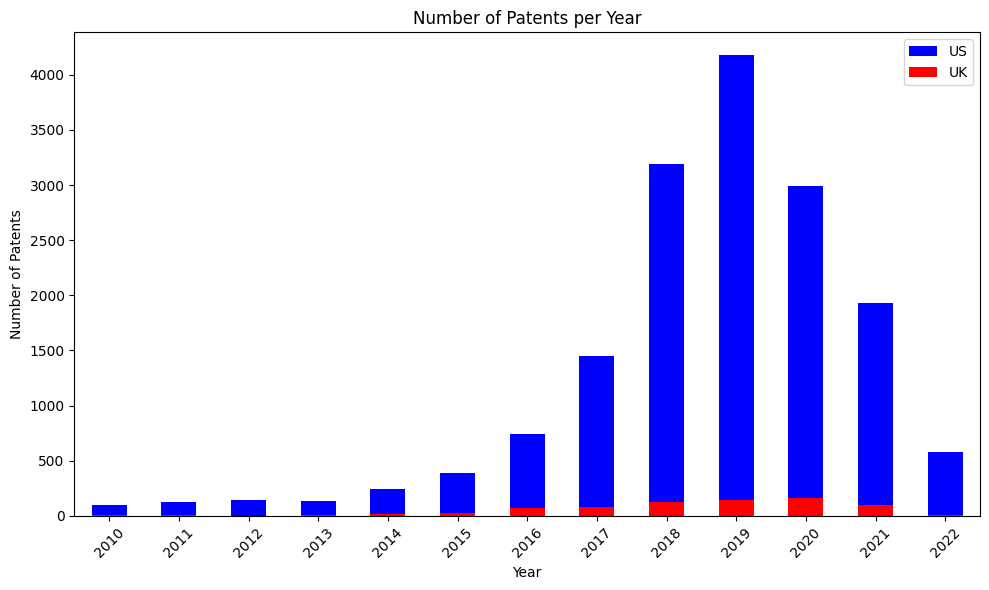

In [7]:
# Bar chart for number of patents per year
plt.figure(figsize=(10, 6))
patents_per_year = patents_per_month.groupby('filingYear')['number_of_patents'].sum()
uk_patents_per_year = uk_patents_per_month.groupby('filingYear')['number_of_patents'].sum()
patents_per_year.plot(kind='bar', color='blue')
uk_patents_per_year.plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.legend(['US', 'UK'])
plt.title('Number of Patents per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

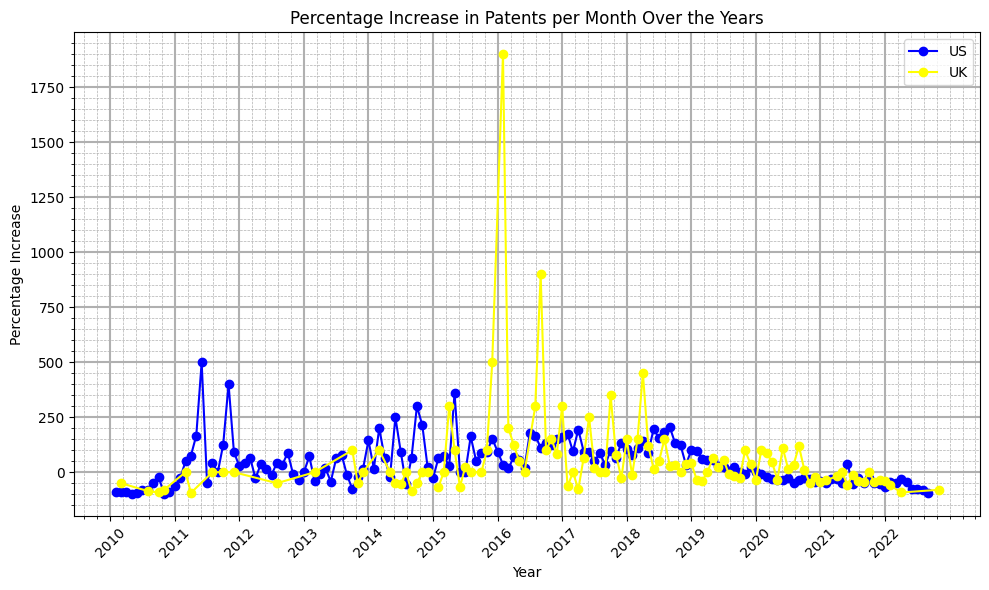

In [8]:
# Line chart for percentage increase over the years with NaN values skipped
plt.figure(figsize=(10, 6))
plt.plot(patents_per_month['filingYear'] + (patents_per_month['filingMonth'] - 1) / 12,
         patents_per_month['percentage_increase'], marker='o', linestyle='-', color='blue')
plt.plot(uk_patents_per_month['filingYear'] + (uk_patents_per_month['filingMonth'] - 1) / 12,
         uk_patents_per_month['percentage_increase'], marker='o', linestyle='-', color='yellow')

plt.xlabel('Year')
plt.ylabel('Percentage Increase')
plt.title('Percentage Increase in Patents per Month Over the Years')
plt.legend(['US', 'UK'])
plt.xticks(patents_per_month['filingYear'].unique(), rotation=45)
plt.minorticks_on()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True, which='major', linestyle='-', linewidth=1.5)
plt.tight_layout()
plt.show()



In [9]:
# Load and preprocess the data
patents_per_month_df = patents_per_month_df.drop(columns=['percentage_increase'])
patents_per_month_df['filingMonthYear'] = pd.to_datetime(patents_per_month_df['filingMonthYear'])
patents_per_month_df.set_index('filingMonthYear', inplace=True)
#patents_per_month_df.rename('number_of_patents')
print(patents_per_month_df.head(5))

                 number_of_patents
filingMonthYear                   
2010-01-01                      18
2010-02-01                       7
2010-03-01                       6
2010-04-01                       8
2010-05-01                       3


C:\Users\Akande\AppData\Local\Temp\ipykernel_17220\3338611527.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  patents_per_month_df['filingMonthYear'] = pd.to_datetime(patents_per_month_df['filingMonthYear'])


In [10]:
#infer the frequency of the data
patents_per_month_df = patents_per_month_df.asfreq(pd.infer_freq(patents_per_month_df.index))
print(patents_per_month_df.head(5))

                 number_of_patents
filingMonthYear                   
2010-01-01                      18
2010-02-01                       7
2010-03-01                       6
2010-04-01                       8
2010-05-01                       3


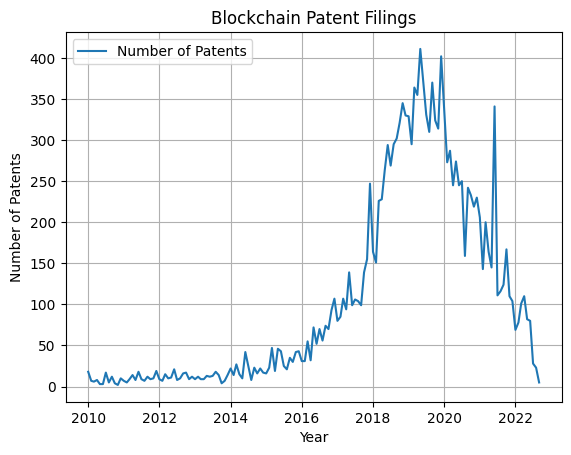

ADF Statistic: -2.437391377153296
p-value: 0.13145981246259747


In [139]:
# Visualize the time series data
plt.plot(patents_per_month_df)
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.title('Blockchain Patent Filings')
plt.legend(['Number of Patents','Percentage Change'])
#plt.xticks(patents_per_year_df['filingYear'], rotation=45)
plt.grid()
plt.show()

# Perform Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(patents_per_month_df['number_of_patents'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])




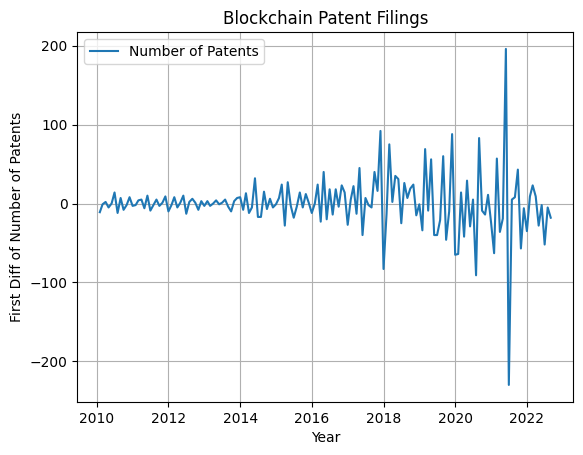

In [140]:
# Perform first differencing to make the data stationary
patents_per_month_df_diff = patents_per_month_df.diff().dropna()

# Visualize the time series data
plt.plot(patents_per_month_df_diff)
plt.xlabel('Year')
plt.ylabel('First Diff of Number of Patents')
plt.title('Blockchain Patent Filings')
plt.legend(['Number of Patents','Percentage Change'])
#plt.xticks(patents_per_year_df['filingYear'], rotation=45)
plt.grid()
plt.show()

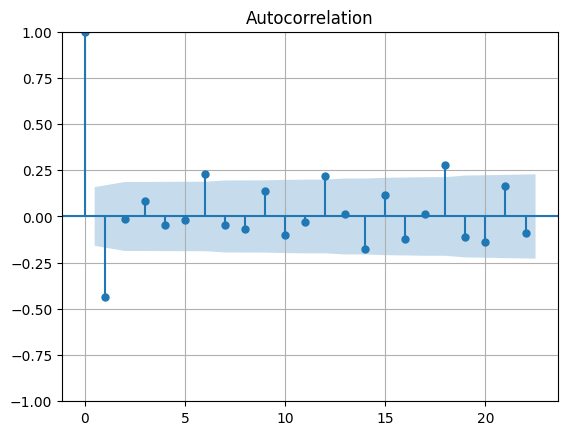

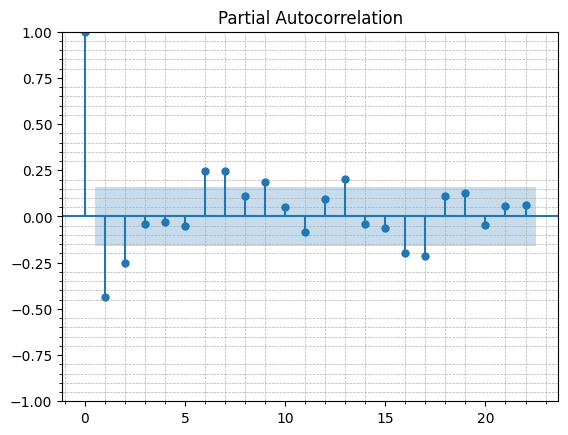

In [142]:
# Plot ACF and PACF plots
plot_acf(patents_per_month_df_diff['number_of_patents'])
plt.grid()
plot_pacf(patents_per_month_df_diff['number_of_patents'])  # Use a smaller number of lags
plt.minorticks_on()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True, which='major', linestyle='--', linewidth=0.7)
plt.grid()
plt.show()



### Based on PACF, we should start with an Auto Regressive Model with lags 1, 2, 5

### Get training and test sets

In [143]:
train_end = datetime(2021,12,1)
test_end = datetime(2022,12,1)

#train_data = patents_per_month_df_diff['number_of_patents']  # Select the target column
train_data = patents_per_month_df_diff[:train_end]
test_data = patents_per_month_df_diff[train_end + timedelta(days=1):test_end]


## Fit the AR Model

In [223]:
#create the model
model = ARIMA(train_data, order=(7,1,0))


In [224]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)


Model Fitting Time: 0.35909128189086914


In [225]:
#summary of model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      number_of_patents   No. Observations:                  143
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -688.008
Date:                Fri, 18 Aug 2023   AIC                           1392.016
Time:                        03:10:34   BIC                           1415.663
Sample:                    02-01-2010   HQIC                          1401.625
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6524      0.050    -33.253      0.000      -1.750      -1.555
ar.L2         -1.9541      0.096    -20.256      0.000      -2.143      -1.765
ar.L3         -1.9002      0.139    -13.629      0.0

In [226]:

#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [228]:

#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

#convert predictions to dataframe with index column= 'filingMonthYear' and next column= 'number_of_patents'
# Convert the dictionary to a DataFrame
predictions = pd.DataFrame(predictions.items(), columns=['filingMonthYear', 'number_of_patents'])
predictions['filingMonthYear'] = pd.to_datetime(predictions['filingMonthYear'])  # Convert the 'filingMonthYear' column to datetime
predictions.set_index('filingMonthYear', inplace=True)  # Set 'filingMonthYear' as the index


residuals = test_data - predictions
#print(test_data)
#print(predictions)
print(residuals)




                 number_of_patents
filingMonthYear                   
2022-01-01              -34.791207
2022-02-01               82.987679
2022-03-01               17.044107
2022-04-01              -20.418916
2022-05-01                5.847322
2022-06-01               23.774895
2022-07-01              -40.303275
2022-08-01               19.067801
2022-09-01               -0.608865


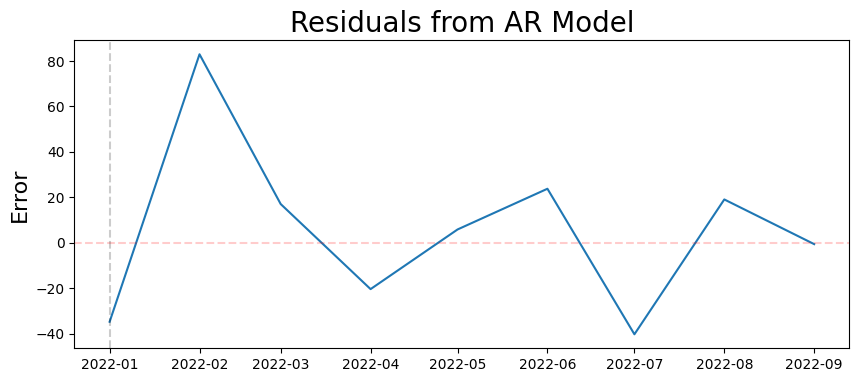

In [229]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2022, 2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

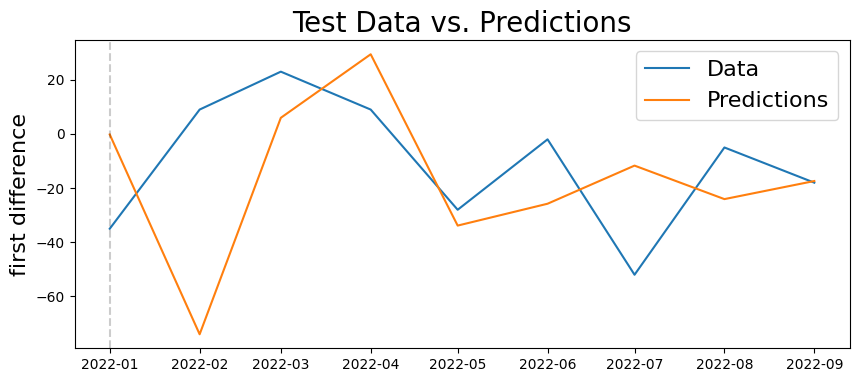

In [230]:

plt.figure(figsize=(10, 4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Test Data vs. Predictions', fontsize=20)
plt.ylabel('first difference', fontsize=16)
for year in range(2022, 2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [234]:
print('Mean Absolute Percentage Error:', round(np.mean(abs(residuals['number_of_patents']/test_data['number_of_patents'])), 4))

Mean Absolute Percentage Error: 3.327


In [235]:
print('Root Mean Square Error:', np.sqrt(np.mean(residuals['number_of_patents']**2)))

Root Mean Square Error: 35.578644039855085
